In [4]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import ToTensor, ToPILImage
import glob
import csv
import cv2
import math
from random import sample
from shutil import copy
from skimage.metrics import structural_similarity as skssim
from skimage.metrics import peak_signal_noise_ratio as skpsnr
from grad import sobel_demo, is_image_file, write_csv, read_csv, get_imgdir_grad, get_sorted_grad_list
from gradient import Get_gradient_nopadding,Get_lap_gradient_nopadding

# 产生AID数据集

In [ ]:
sorted_grads = get_sorted_grad_list("AID-grad.csv")

In [ ]:
low_grads = sorted_grads[:3000]
mid_grads = sorted_grads[2500:5500]
high_grads = sorted_grads[5000:]

In [ ]:
write_csv("AID-cross-low.csv",low_grads)
write_csv("AID-cross-mid.csv",mid_grads)
write_csv("AID-cross-high.csv",high_grads)

In [ ]:
sorted_test_grads = get_sorted_grad_list("AIDtest.csv")

In [ ]:
grads = read_csv("AID-grad.csv")

In [ ]:
test_set = sample(grads, 2000)

In [ ]:
train_set = list(set(grads)-set(test_set))

In [ ]:
write_csv("AIDtrain.csv",train_set)
write_csv("AIDtest.csv",test_set)

In [ ]:
csv_path = "AIDtest.csv"
save_path = "AID-test"
if not os.path.exists(save_path):
    os.mkdir(save_path) 
src_dir = r"E:\Code\Python\datas\selfAID\AID"
grads = read_csv(csv_path)
for k,v in grads:
    src = os.path.join(src_dir,k)
    dst = os.path.join(save_path,k)  
    copy(src,dst)    



# 展示AID数据集

In [5]:
csv_path = "AID-grad.csv"
grads = read_csv(csv_path)
sorted_grads = get_sorted_grad_list(csv_path)

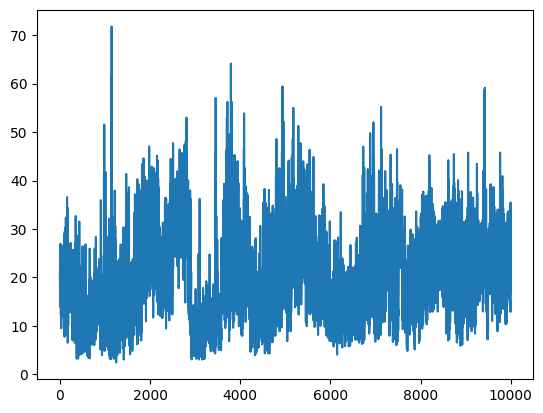

In [6]:
gradv = []
for k,v in grads:
   gradv.append(v) 
plt.plot(gradv)

(array([  7.,  25.,  62.,  87., 120., 139., 167., 153., 198., 224., 234.,
        234., 260., 240., 260., 287., 265., 315., 312., 289., 327., 306.,
        303., 289., 286., 265., 267., 258., 251., 255., 225., 232., 210.,
        227., 184., 182., 165., 162., 144., 163., 144., 137., 123., 126.,
        108., 107., 100.,  72.,  75.,  56.,  42.,  51.,  39.,  39.,  33.,
         27.,  19.,  19.,  12.,  10.,  15.,   9.,   8.,   9.,   5.,   3.,
          3.,   1.,   1.,   0.,   4.,   2.,   3.,   1.,   2.,   3.,   2.,
          2.,   2.,   0.,   0.,   2.,   2.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 2.47036738,  3.16346928,  3.85657118,  4.54967308,  5.24277498,
         5.93587688,  6.62897878,  7.32208069,  8.01518259,  8.70828449,
         9.40138639, 10.09448829, 10.78759019, 11.48069209, 12.17379399,
        12.86689589, 13.5599978 , 14.2530997 , 14.9462016 , 15.6393035 ,
        16.3324054 , 17.02

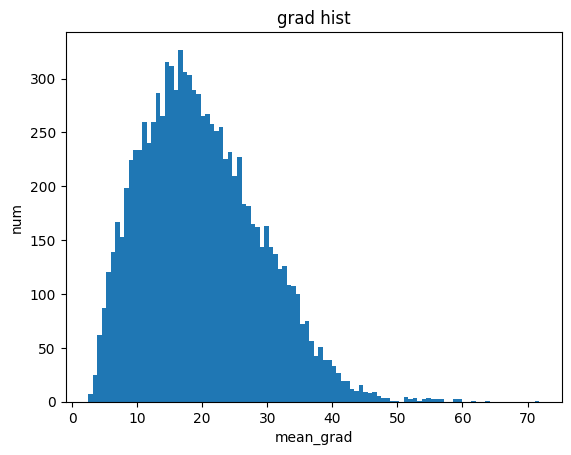

In [7]:
plt.xlabel("mean_grad")
plt.ylabel("num")
plt.title("grad hist")
plt.hist(gradv, 100)

(array([ 6.,  5., 16., 16., 21., 23., 22., 28., 21., 26., 29., 31., 45.,
        36., 35., 38., 43., 54., 49., 40., 59., 50., 44., 54., 49., 37.,
        62., 32., 45., 48., 44., 50., 45., 40., 41., 39., 34., 39., 36.,
        32., 39., 28., 32., 25., 24., 17., 19., 30., 30., 25., 28., 21.,
        23., 16., 24., 19., 15., 16., 12., 12., 11.,  5.,  7.,  3.,  6.,
         6.,  4.,  4.,  5.,  2.,  5.,  3.,  1.,  5.,  2.,  2.,  1.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([ 3.07137472,  3.63205151,  4.1927283 ,  4.75340509,  5.31408188,
         5.87475867,  6.43543546,  6.99611225,  7.55678904,  8.11746584,
         8.67814263,  9.23881942,  9.79949621, 10.360173  , 10.92084979,
        11.48152658, 12.04220337, 12.60288016, 13.16355696, 13.72423375,
        14.28491054, 14.84558733, 15.40626412, 15.96694091, 16.5276177 ,
        17.08829449, 17.64897128, 18.20964807, 18.77032487, 19.331001

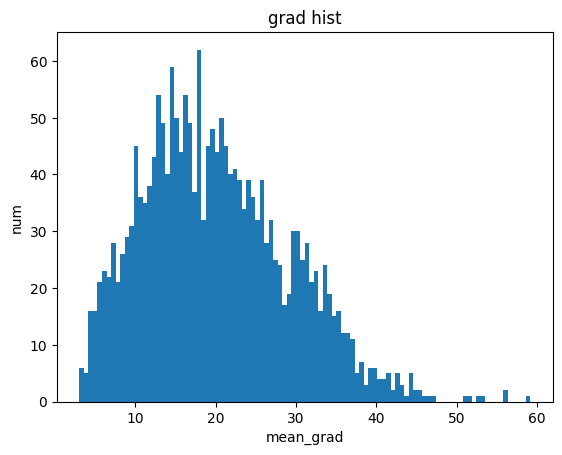

In [8]:
rangrads = sample(gradv, 2000)
plt.xlabel("mean_grad")
plt.ylabel("num")
plt.title("grad hist")
plt.hist(rangrads, 100)

(array([ 26.,  89., 149., 185., 226., 255., 264., 264., 280., 279., 284.,
        333., 268., 306., 306., 300., 289., 264., 252., 274., 244., 245.,
        244., 203., 229., 231., 206., 219., 191., 182., 172., 174., 154.,
        150., 165., 151., 122., 129., 141., 130., 105., 109.,  95., 115.,
         91.,  83.,  84.,  77.,  87.,  58.,  49.,  52.,  45.,  45.,  39.,
         36.,  18.,  30.,  21.,  21.,  25.,  19.,  20.,  11.,  11.,   5.,
          8.,   6.,   6.,   3.,   4.,   5.,   4.,   7.,   1.,   3.,   0.,
          6.,   1.,   1.,   1.,   3.,   2.,   4.,   1.,   0.,   2.,   1.,
          1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([ 0.98662778,  1.67482514,  2.3630225 ,  3.05121986,  3.73941722,
         4.42761458,  5.11581194,  5.80400931,  6.49220667,  7.18040403,
         7.86860139,  8.55679875,  9.24499611,  9.93319347, 10.62139083,
        11.30958819, 11.99778556, 12.68598292, 13.37418028, 14.06237764,
        14.750575  , 15.43

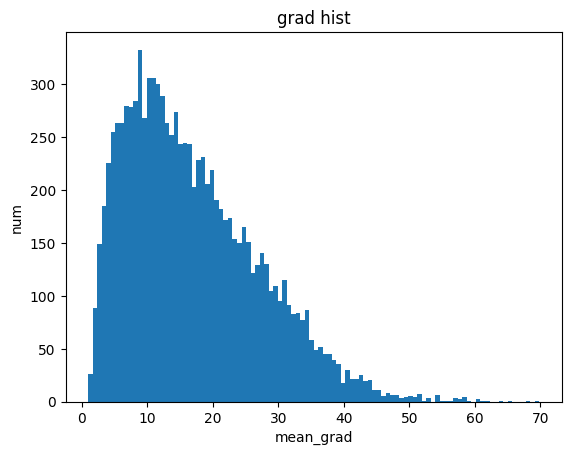

In [5]:
csv_path = "AID-grad-lap.csv"
grads = read_csv(csv_path)
gradv = []
for k,v in grads:
   gradv.append(v) 
# plt.plot(gradv)
plt.xlabel("mean_grad")
plt.ylabel("num")
plt.title("grad hist")
plt.hist(gradv, 100)

(array([  9.,  20.,  34.,  45.,  57.,  96.,  75.,  93., 119., 136., 115.,
        141., 179., 170., 188., 185., 204., 196., 233., 212., 240., 230.,
        269., 264., 256., 259., 299., 285., 287., 259., 259., 234., 229.,
        233., 265., 203., 249., 211., 206., 194., 214., 194., 197., 160.,
        180., 162., 158., 156., 149., 136., 119., 108., 102.,  63.,  67.,
         53.,  59.,  46.,  39.,  28.,  28.,  17.,  17.,  15.,  17.,   8.,
          3.,   9.,  10.,   5.,   6.,   2.,   9.,   4.,   1.,   2.,   1.,
          2.,   1.,   2.,   2.,   3.,   0.,   1.,   0.,   1.,   1.,   0.,
          2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.]),
 array([  2.92573056,   4.15238983,   5.37904911,   6.60570839,
          7.83236767,   9.05902694,  10.28568622,  11.5123455 ,
         12.73900478,  13.96566406,  15.19232333,  16.41898261,
         17.64564189,  18.87230117,  20.09896044,  21.32561972,
         22.552279  ,  23.77893828,  25.00559756,  26.23225683

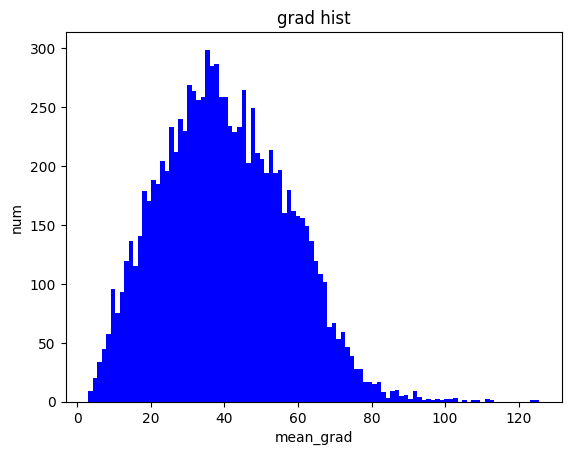

In [6]:
csv_path = "AID-grad-sobel.csv"
grads = read_csv(csv_path)
gradv = []
for k,v in grads:
   gradv.append(v) 
# plt.plot(gradv)
plt.xlabel("mean_grad")
plt.ylabel("num")
plt.title("grad hist")
plt.hist(gradv, 100, color="blue")